In [1]:
#Importing required libraries    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # To visualize
from pandas_profiling import ProfileReport
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import OneRClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
%matplotlib inline

In [2]:
# Python Tasks
# Question 1

#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip  #profiling tool installation

a1=pd.read_csv('red_wine.csv')
profile1 = ProfileReport(a1, title="Pandas Profiling Report", explorative=True)
profile1.to_file("HW2_python.html")


# Question 1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
# Question 2

#Loading the dataset
df = pd.read_csv('red_wine.csv')
mapping = {'high': 1, 'low': 0}
df=df.replace({'type': mapping})

X = df.iloc[:,:-1] # values converts it into a numpy array
y = df.iloc[:,-1]
X1 = df.iloc[:,:-1].values # values converts it into a numpy array
y1 = df.iloc[:,-1].values
 
#Implementing cross validation
kf = KFold(n_splits=10, random_state=None)
acc_score = []


def classification (model):
    acc_score = []
    for train_index , test_index in kf.split(X):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]
       
        model.fit(X_train,y_train)# perform linear regression
        pred_values = model.predict(X_test) # make predictions
        kmean=cross_val_score(model,X_train,y_train,cv=kf).mean()#for Accuracy(%)
        kmean=kmean*100
        
        auc = cross_val_score(model, X_train,y_train, scoring='roc_auc', cv=kf).mean() # for AUC
        
        return auc,kmean
    
    
    
def Zero_oneR (model):
    acc_score = []
    for train_index1 , test_index1 in kf.split(X1):
        X_train1 , X_test1 = X1[train_index1,:],X1[test_index1,:]
        y_train1 , y_test1 = y1[train_index1] , y1[test_index1]
        
        fold_acc1=cross_val_score(model,X_train1,y_train1,cv=kf)
        
        kmean1=fold_acc1.mean()
        kmean1=kmean1*100
        return kmean1
    
    
auc1,model1= classification(LogisticRegression())
auc2,model2= classification(GaussianNB()) 
auc3,model3= classification(DecisionTreeClassifier()) 
auc4,model4= classification(SVC())
auc5,model5= classification(RandomForestClassifier()) 
model6= Zero_oneR(OneRClassifier())
model7= Zero_oneR(DummyClassifier(strategy="most_frequent"))


#Store the result in Dataframe

df1 = pd.DataFrame({'Model':['AUC','Accuracy(%)'],'ZeroR':['N/A',model7],'OneR':['N/A',model6],'LR':[auc1,model1],
                   'NB':[auc2,model2],'DT':[auc3,model3],'SVM':[auc4,model4],'RF':[auc5,model5]})
df1=df1.style.set_properties(subset=['Model'],**{'font-weight': 'bold'}).hide_index()
print('Question 2 ')
print(' ')    
df1

Question 2 
 


Model,ZeroR,OneR,LR,NB,DT,SVM,RF
AUC,N/A,N/A,0.871898,0.897185,0.787433,0.856939,0.926452
Accuracy(%),51.640271,77.006033,77.590498,83.242836,80.361991,54.532428,83.269231


Question 3 
 
ROC curve for Random Forest classifier with K fold


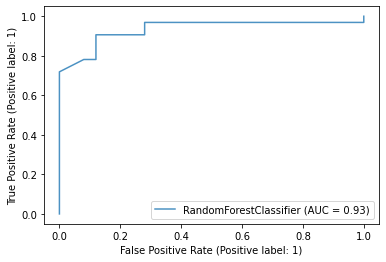

ROC curve for Random Forest classifier without K fold


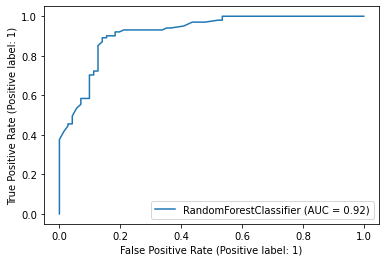

In [4]:
#Question 3 

# ROC curve for Random Forest classifier with K fold

df = pd.read_csv('red_wine.csv')
mapping = {'high': 1, 'low': 0}
df=df.replace({'type': mapping})
X = df.iloc[:,:-1] # values converts it into a numpy array
y = df.iloc[:,-1]

kf = KFold(n_splits=10, random_state=None)#Implementing cross validation
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    model= RandomForestClassifier()
    model.fit(X_train,y_train)# perform linear regression
    pred_values = model.predict(X_test) # make predictions
    
    kmean=cross_val_score(model,X_train,y_train,cv=kf).mean()
    kmean=kmean*100
    auc = cross_val_score(model, X_train,y_train, scoring='roc_auc', cv=10)       
#print('Random Forest classifier: Accuracy wit K fold - {0:.4f} '.format(kmean),'%')

# Graph Plot
print('Question 3 ')
print(' ')    
print('ROC curve for Random Forest classifier with K fold')
ax = plt.gca()
rfc_disp = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

#---------------------------------------------------------------------------------------------------

# ROC curve for Random Forest classifier without K fold


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rlf=RandomForestClassifier(n_estimators=100)
rlf.fit(X_train,y_train)
y_pred=rlf.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
#print("Accuracy without K fold:",accuracy)

#plot
print('ROC curve for Random Forest classifier without K fold')
rlf_disp = plot_roc_curve(rlf, X_test, y_test)
plt.show()


In [5]:
#Question 4

#Loading the dataset
df = pd.read_csv('white_wine.csv')
mapping = {'high': 1, 'low': 0}
df=df.replace({'type': mapping})

X = df.iloc[:,:-1] # values converts it into a numpy array
y = df.iloc[:,-1]

#Implementing cross validation
kf = KFold(n_splits=10, random_state=None)
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    model= RandomForestClassifier()
    model.fit(X_train,y_train)# perform linear regression
    pred_values = model.predict(X_test) # make predictions
    
    kmean=cross_val_score(model,X_train,y_train,cv=kf).mean()
    kmean=kmean*100
    auc = cross_val_score(model, X_train,y_train, scoring='roc_auc', cv=10).mean() 
    
print('Question 4 ')
print(' ')    
print('Random Forest classifier : Accuracy - {0:.4f} '.format(kmean),'%')
print('                         : AUC      - {0:.4f} '.format(auc))


Question 4 
 
Random Forest classifier : Accuracy - 87.6786  %
                         : AUC      - 0.9583 
